In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

## Dataset Story
Telco churn data includes information about a fictitious telecom company that provided home phone and Internet services to 7,043 California customers in the third quarter. It shows which customers have left, stayed or signed up for their service.

In [118]:
def load():
    data = pd.read_csv("Telco-Customer-Churn.csv")
    return data

Check out the overall picture

In [119]:
df = load()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.000,0.162,0.369,0.000,0.000,0.000,0.000,1.000
tenure,7043.000,32.371,24.559,0.000,9.000,29.000,55.000,72.000
MonthlyCharges,7043.000,64.762,30.090,18.250,35.500,70.350,89.850,118.750


Capture the numeric and categorical variables.

In [122]:
def grab_colname(dataframe,cat_th = 10, car_th = 20):
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O"]
    num_but_cats = [ col for col in num_cols if  dataframe[col].nunique() < cat_th]
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    cat_cols = cat_cols + num_but_cats
    print(f'Observation:{dataframe.shape[0]}')
    print(f'Variables:{dataframe.shape[1]}')
    print(f'num_cols:{len(num_cols)}')
    print(f'cat_cols:{len(cat_cols)}')
    return num_cols,cat_cols



In [123]:
num_cols,cat_cols = grab_colname(df)

Observation:7043
Variables:21
num_cols:3
cat_cols:19


In [124]:
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn',
 'SeniorCitizen']

Perform target variable analysis. (The mean of the target variable according to the categorical variables, the mean of the numeric variables according to the target variable)

In [125]:
for col in num_cols:
    for col1 in cat_cols:
     a=df.groupby(col1).agg({col:["mean"]})
     print(a)

           SeniorCitizen
                    mean
customerID              
0002-ORFBO         0.000
0003-MKNFE         0.000
0004-TLHLJ         0.000
0011-IGKFF         1.000
0013-EXCHZ         1.000
0013-MHZWF         0.000
0013-SMEOE         1.000
0014-BMAQU         0.000
0015-UOCOJ         1.000
0016-QLJIS         0.000
0017-DINOC         0.000
0017-IUDMW         0.000
0018-NYROU         0.000
0019-EFAEP         0.000
0019-GFNTW         0.000
0020-INWCK         0.000
0020-JDNXP         0.000
0021-IKXGC         1.000
0022-TCJCI         1.000
0023-HGHWL         1.000
0023-UYUPN         1.000
0023-XUOPT         0.000
0027-KWYKW         0.000
0030-FNXPP         0.000
0031-PVLZI         0.000
0032-PGELS         0.000
0036-IHMOT         0.000
0040-HALCW         0.000
0042-JVWOJ         0.000
0042-RLHYP         0.000
0048-LUMLS         0.000
0048-PIHNL         0.000
0052-DCKON         0.000
0052-YNYOT         0.000
0056-EPFBG         0.000
0057-QBUQH         0.000
0058-EVZWM         0.000


Perform outlier observation analysis.


In [126]:
def outlier_tresholds(dataframe,columns,q1=0.25,q3=0.75):
    quartile1 = dataframe[columns].quantile(q1)
    quartile3 = dataframe[columns].quantile(q3)
    iqr = quartile3 - quartile1
    low_limit = quartile1- 1.5*iqr
    up_limit = quartile3 + 1.5*iqr
    return low_limit,up_limit

In [127]:
def check_outlier(dataframe,col_name):
    low,up = outlier_tresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name] < low) | (dataframe[col_name] > up)].any(axis=None):
        return True
    else:
        return False


In [128]:
for col in num_cols:
    print(f'columns:{col}',check_outlier(df,col))

columns:SeniorCitizen True
columns:tenure False
columns:MonthlyCharges False


Perform a missing observation analysis.

In [129]:
def missing_values(dataframe):
    na_cols = [ col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_cols].isnull().sum().sort_values(ascending = False)
    ratio =(dataframe[na_cols].isnull().sum()/dataframe.shape[0] * 100 )
    missing_df = pd.concat([n_miss,np.round(ratio,2)],axis=1,keys=['n_miss','ratio'])
    print(missing_df,end="\n")
    return na_cols

In [130]:
missing_values(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

In [131]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


Perform correlation analysis.

In [132]:
corr =df[num_cols].corr()
corr

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000,0.017,0.220
tenure,0.017,1.000,0.248
MonthlyCharges,0.220,0.248,1.000


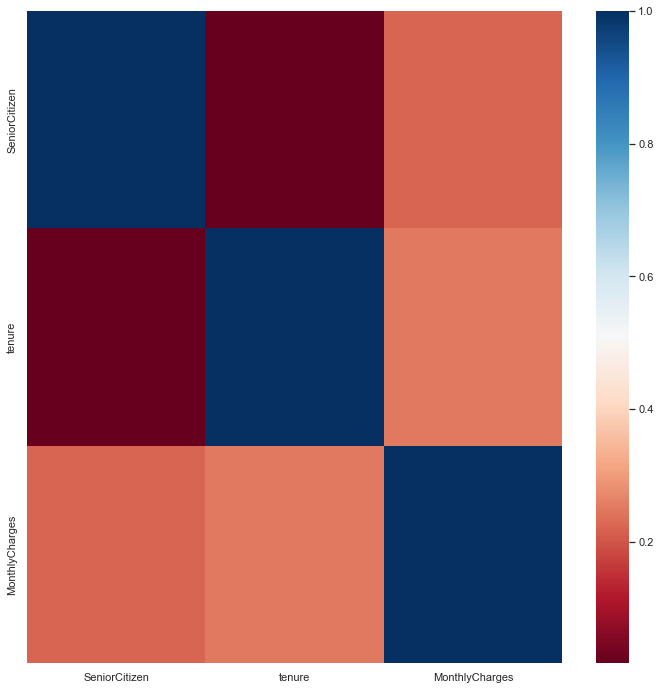

In [133]:
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(corr,cmap="RdBu");

In [134]:
corr_matrix =corr.abs()
corr_matrix

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000,0.017,0.220
tenure,0.017,1.000,0.248
MonthlyCharges,0.220,0.248,1.000


Take necessary actions for missing and contradictory observations.

In [137]:
def remove_outlier(dataframe,col_name):
    up,low = outlier_tresholds(dataframe,col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low) | ( dataframe[col_name] > up))].head()
    return df_without_outliers

In [138]:
for col in num_cols:
    print(remove_outlier(df,col))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges Churn
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check          29.850        29.85    No
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check          56.950       1889.5    No
2  3668-QPYBK    Male              0      No         No       2          Yes                No             DSL            Yes  

#### Perform encoding operations

In [139]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [144]:
le = LabelEncoder()

In [154]:
le.fit_transform(df["OnlineSecurity"])[0:10]
le.inverse_transform([0,1,2])

array(['No', 'No internet service', 'Yes'], dtype=object)

In [156]:
le.fit_transform(df["Churn"])[0:10]
le.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

#### Standardize for numeric variables

In [158]:
ss = StandardScaler()
df[num_cols] = ss.fit_transform(df[num_cols])
df[num_cols].head()

,SeniorCitizen,tenure,MonthlyCharges
0,-0.440,-1.277,-1.160
1,-0.440,0.066,-0.260
2,-0.440,-1.237,-0.363
3,-0.440,0.514,-0.747
4,-0.440,-1.237,0.197


In [159]:
df["Seniorcitizen_Scaler"] = ss.fit_transform(df[["SeniorCitizen"]])